In [1]:
import pandas as pd


%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dados = pd.read_csv('data/arquivo.csv',sep = ';')
dados.head()



Tipo               Bairro  Quartos  Vagas  Suites  Area   Valor  \
0  Apartamento               Centro        1      0       0    15   800.0   
1  Apartamento         Higienópolis        1      0       0    48   800.0   
2  Apartamento             Cachambi        2      0       0    50  1300.0   
3  Apartamento               Grajaú        2      1       0    70  1500.0   
4  Apartamento  Lins de Vasconcelos        3      1       1    90  1500.0   

   Condominio  IPTU  Valor m2 Tipo Agregado  
0       390.0  20.0     53.33   Apartamento  
1       230.0   0.0     16.67   Apartamento  
2       301.0  17.0     26.00   Apartamento  
3       642.0  74.0     21.43   Apartamento  
4       455.0  14.0     16.67   Apartamento

In [4]:
print(dados['Tipo'][:10] + '\n...')

0    Apartamento\n...
1    Apartamento\n...
2    Apartamento\n...
3    Apartamento\n...
4    Apartamento\n...
5    Apartamento\n...
6    Apartamento\n...
7    Apartamento\n...
8    Apartamento\n...
9    Apartamento\n...
Name: Tipo, dtype: object


In [7]:
dados['Tipo'].unique() #types of iris

array(['Apartamento', 'Casa', 'Casa de Condomínio', 'Casa de Vila',
       'Quitinete'], dtype=object)

In [5]:
iris['feature_names'] #description of each feature

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:

print(iris['data'].shape)
iris['data'][:10] #contains the measurement of each flower

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [7]:

#an numpy array containing 0 to 2 values. Each one for a flower type. 0 for Setosa, 1 for Versicolor and 2 for Virginica
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state = 0)

print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


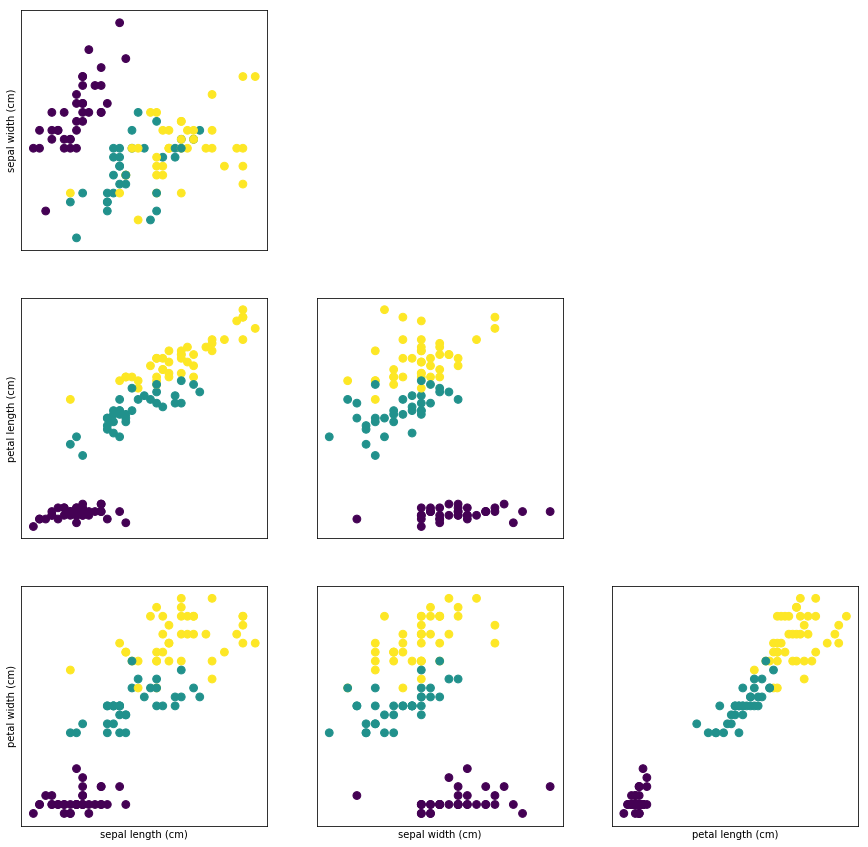

In [9]:
fig, ax = plt.subplots(3, 3, figsize=(15,15))

for i in range(3):
    for j in range(3):
        ax[i,j].scatter(X_train[:,j], X_train[:, i + 1], c=y_train, s=60)
        ax[i,j].set_xticks(())
        ax[i,j].set_yticks(())
        
        if i == 2:
            ax[i,j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i,j].set_ylabel(iris['feature_names'][i + 1])
        if j > i:
            ax[i,j].set_visible(False)

In [10]:
#Creating the model
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [11]:
#testing model
X_new = np.array([[7.1,3.3,4.8,1.5]])
X_new.shape

(1, 4)

In [12]:
prediction = knn.predict(X_new)
prediction

array([1])

In [13]:
iris['target_names'][prediction]

array(['versicolor'], dtype='<U10')

In [14]:
#Accuracy of the model
knn.score(X_test, y_test)

0.9736842105263158